# Image classification Tensorflow using CNNs

In [115]:
import tensorflow as tf
import zipfile
from pathlib import Path
from PIL import Image

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [116]:
trainSet = Path(r"E:\Datasets\CatsVsDogs\TrainingSet")
testSet = Path(r"E:\Datasets\CatsVsDogs\TestSet")

Printing a sample image of a cat

In [117]:
catsDir = trainSet / "cats"
dogsDir = trainSet / "dogs"

In [118]:
imgPathCat = random.choice(list(catsDir.glob("*.*")))
imgPathDog = random.choice(list(dogsDir.glob("*.*")))

In [119]:
imgCat = Image.open(imgPathCat).convert("RGB")

In [120]:
imgDog = Image.open(imgPathDog).convert("RGB")

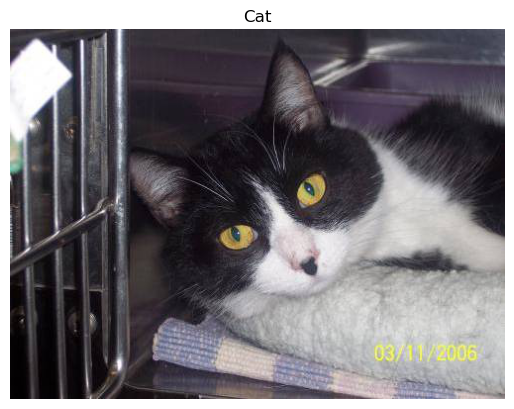

In [121]:
plt.imshow(imgCat)
plt.axis("off")
plt.title("Cat")
plt.show()

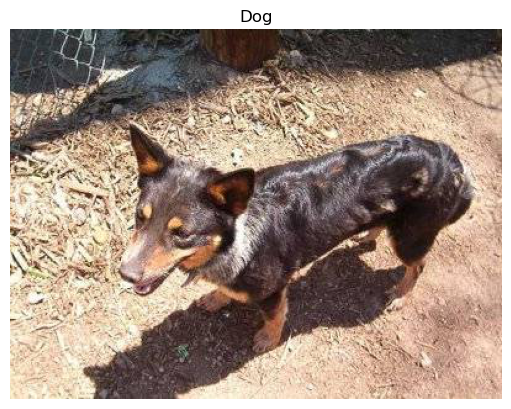

In [122]:
plt.imshow(imgDog)
plt.axis("off")
plt.title("Dog")
plt.show()